In [6]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [7]:
X_train = np.loadtxt('input.csv', delimiter=',')
Y_train = np.loadtxt('labels.csv', delimiter=',')

X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test = np.loadtxt('labels_test.csv', delimiter=',')

In [16]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(2000, 30000)
(400, 30000)
(2000,)
(400,)


In [17]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)
X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)


In [18]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2000, 100, 100, 3)
(400, 100, 100, 3)
(2000, 1)
(400, 1)


In [19]:
X_train = X_train/255.0
X_test = X_test/255.0

X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

In [20]:
import matplotlib.pyplot as plt

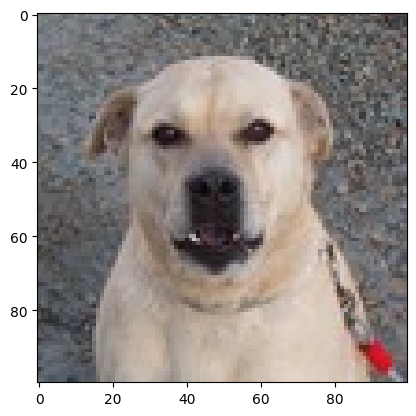

In [26]:
plt.imshow(X_train[5,:])

In [28]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

c:\Users\Shuvadipta Biswas\Desktop\data\cnn_catdog\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
model.fit(X_train, Y_train, epochs= 5, batch_size= 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 190ms/step - accuracy: 0.9143 - loss: 0.2078
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 176ms/step - accuracy: 0.9559 - loss: 0.1375
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - accuracy: 0.9776 - loss: 0.1000
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.9822 - loss: 0.0721
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.9895 - loss: 0.0596


In [35]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6711 - loss: 1.3562


[1.1649277210235596, 0.699999988079071]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[0.03380723]] : Dog


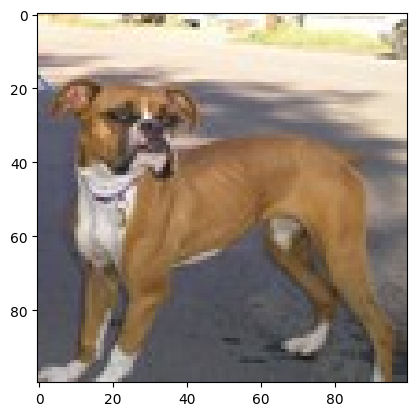

In [42]:
plt.imshow(X_test[1,:])
Y_pred = model.predict(X_test[1,:].reshape(1,100,100,3))
if 1-Y_pred > 0.5:
    print(Y_pred,": Dog")
else:
    print(Y_pred,": Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
[[0.9999926]] : Cat


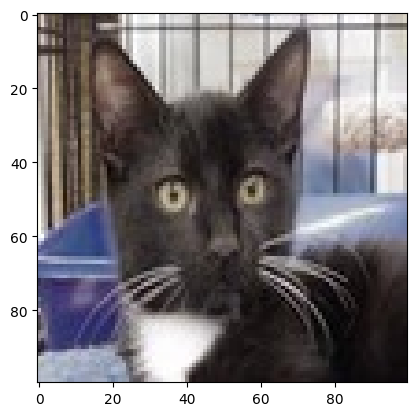

In [55]:
plt.imshow(X_test[290,:])
Y_pred = model.predict(X_test[290,:].reshape(1,100,100,3))
if 1-Y_pred > 0.5:
    print(Y_pred,": Dog")
else:
    print(Y_pred,": Cat")